In [1]:
# importing all the libraries here
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [3]:
# make a dataframe of the csv file in the dataframe data variable using pandas library.
dataset=pd.read_csv('dataframe_.csv')
dataset.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
# to count all the values in inputs
dataset.value_counts('input')

input
-125.366669    11
 112.633331    10
-119.366669     8
-131.366669     8
 80.633331      7
               ..
 41.779811      1
-83.940821      1
-83.805629      1
-82.991855      1
 134.605775     1
Length: 991, dtype: int64

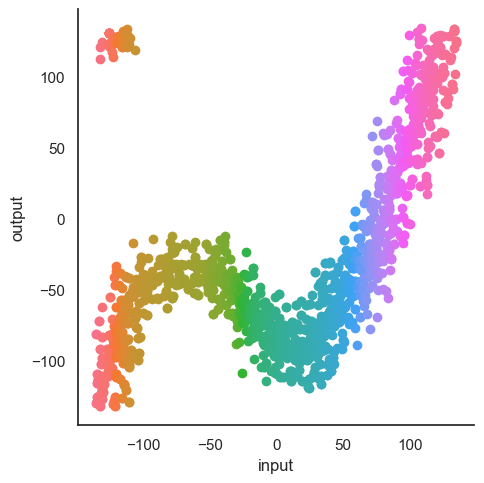

In [35]:
# To get the overview of the output acconding to input with the help of a graph.
sns.FacetGrid(dataset,hue="input",height=5).map(plt.scatter,"input","output")

In [24]:
# here we put the value of input into the x and in y of output.
x=dataset[["input"]].values
y=dataset[["output"]].values
y

array([[-130.5720846],
       [-129.9389289],
       [-130.1418321],
       ...,
       [ -87.       ],
       [-104.9430524],
       [-101.7268941]])

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# create the inputs and outputs according to the data
x, y = make_blobs(centers=2, n_features=2, random_state=2)
# define  the model
model = LogisticRegression(solver='lbfgs')
# fit model by using this function
model.fit(x, y)

LogisticRegression()

In [30]:
# so this model accuracy is checked by this...function.
model.score(x,y)

1.0

In [55]:
#we set the variable of expected and predicted values by using the current dataset.
expected=y
predicted=model.predict(x)
predicted

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [56]:
# to check the outliers we do the following computation.
print("Highest allowed",dataset['input'].mean() + 3*dataset['input'].std())
print("Lowest allowed",dataset['input'].mean() - 3*dataset['input'].std())

Highest allowed 238.17784322179324
Lowest allowed -235.85797793178028


In [44]:
# so there is no outliers in the data .
dataset[(dataset['input'] > 238.17 ) | (dataset['input'] < -235.85)]

,input,output


In [46]:
new_df = dataset[(dataset['input'] > 238.17 ) | (dataset['input'] < -235.85)]
new_df

,input,output


In [50]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x,y)


LinearRegression()

In [61]:
model2.score(x,y)

0.9467561058240045

In [53]:
expected=y
predicted=model2.predict(x)
predicted

array([ 4.08922442e-02, -7.16899293e-02,  2.86178010e-01,  8.77641911e-01,
        1.04037263e+00,  1.82179234e-01, -8.69463750e-02,  1.00222537e+00,
        9.35801243e-02,  2.00678779e-01,  1.02791037e+00,  1.03951378e+00,
        9.74562126e-02,  1.02713456e+00,  1.56585277e-01,  8.78825196e-01,
        9.92455891e-02,  9.89606131e-01,  7.80819369e-02,  1.21764328e-01,
        1.81553824e-01,  1.06396475e+00,  1.02332513e+00, -1.75651282e-02,
       -1.60960546e-01, -1.88516026e-02,  8.58800075e-01, -4.27223582e-02,
        1.85692616e-01,  7.38011040e-01,  1.00180465e+00,  1.01947557e+00,
        1.12236335e+00, -8.90228566e-02, -1.46875955e-01, -3.67333291e-02,
        1.46223124e-01,  1.11159193e+00, -6.82582395e-02,  1.05651898e+00,
        1.05700754e+00, -1.03908203e-01,  1.75757903e-01,  9.92963010e-01,
        6.92483554e-01,  1.25319630e-02,  9.74199072e-01,  1.05955879e+00,
       -1.19089434e-01,  8.50717365e-01,  6.58413507e-03,  1.11571503e+00,
        9.63048773e-01,  

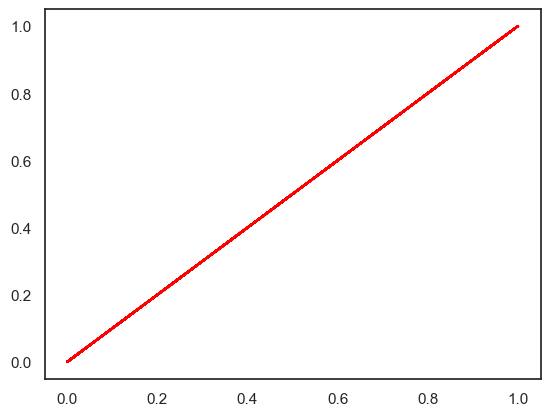

In [57]:
plt.plot(predicted,expected,color="red")
plt.show()

In [58]:
from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [59]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0]
 [ 0 50]]


In [63]:
# score of the model 1 of logistic regression .
model.score(x,y)

1.0

In [64]:
# score of the model 2 of linear regression.
model2.score(x,y)

0.9467561058240045

In [ ]:
# so we conclude that our model(which contains the Logistic Regression technique) 
# is more accurate than the model2 ( which is a linear regression model) so we can
# say that we get the more accurate result from model(logistic regression) in place
# or model2 . And the reason to prove it is that score of both the model(that are 
# mentioned above.)